In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
def positional_encoding(max_pos, d_model):
    pe = np.zeros((max_pos, d_model))
    position = np.arange(0, max_pos, dtype=float)[:, np.newaxis]
    div_term = np.exp(np.arange(0, d_model, 2) * - (np.log(10000.0) / d_model))
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)
    return pe

In [3]:
def scaled_dot_product_attention(q, k, v):
    matmul_qk = np.dot(q, k.T)
    dk = k.shape[-1]
    scaled_attention_logits = matmul_qk / np.sqrt(dk)
    attention_weights = np.exp(scaled_attention_logits - np.max(scaled_attention_logits, axis=-1, keepdims=True))
    attention_weights /= np.sum(attention_weights, axis=-1, keepdims=True)
    output = np.dot(attention_weights, v)
    return output, attention_weights

In [4]:
sentence = "attention is all you need".split()
n = len(sentence)
d_model = 8
embeddings = np.random.randn(n, d_model)
pe = positional_encoding(n, d_model)
x = embeddings + pe
q = k = v = x

In [5]:
output, attention_weights = scaled_dot_product_attention(q, k, v)
print("Sentence:", sentence)
print("Attention Weights (rounded):")
print(np.round(attention_weights, decimals=3))

Sentence: ['attention', 'is', 'all', 'you', 'need']
Attention Weights (rounded):
[[0.922 0.005 0.003 0.067 0.003]
 [0.068 0.623 0.062 0.132 0.115]
 [0.078 0.124 0.601 0.099 0.097]
 [0.097 0.015 0.006 0.847 0.035]
 [0.012 0.044 0.018 0.116 0.809]]


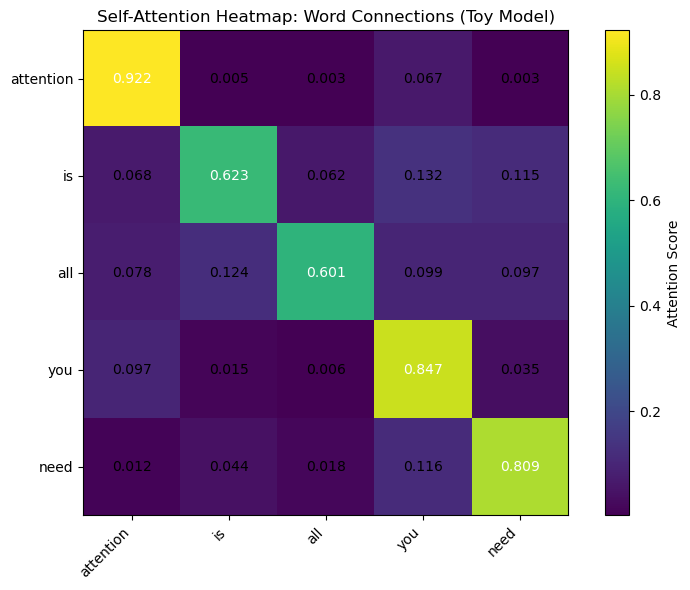

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(attention_weights, cmap='viridis', interpolation='nearest')
ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))
ax.set_xticklabels(sentence, rotation=45, ha='right')
ax.set_yticklabels(sentence)
for i in range(n):
    for j in range(n):
        text = ax.text(j, i, f'{attention_weights[i, j]:.3f}', ha='center', va='center', color='w' if attention_weights[i, j] > 0.5 else 'black')
ax.set_title("Self-Attention Heatmap: Word Connections (Toy Model)")
plt.colorbar(im, ax=ax, label='Attention Score')
plt.tight_layout()
plt.show()

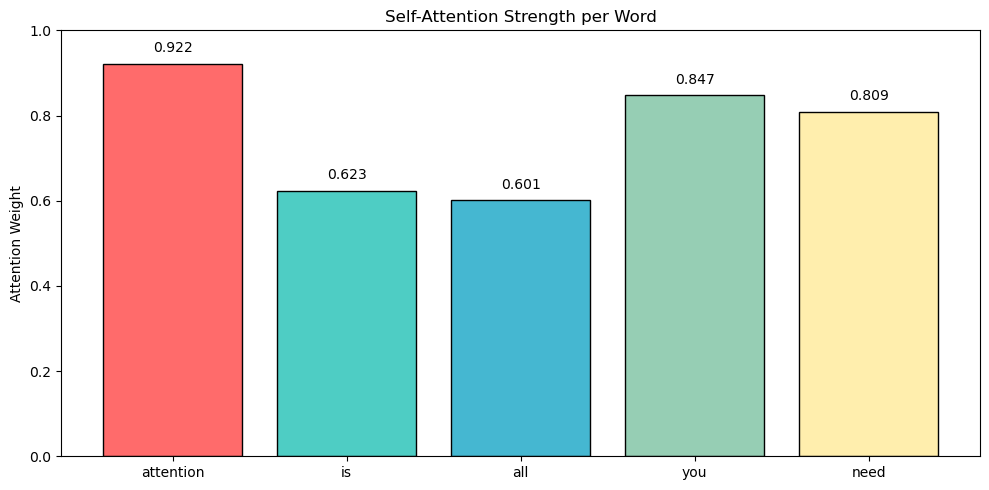

In [7]:
fig2, ax2 = plt.subplots(figsize=(10, 5))
self_attention = np.diag(attention_weights)
ax2.bar(sentence, self_attention, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD'], edgecolor='black')
ax2.set_title("Self-Attention Strength per Word")
ax2.set_ylabel("Attention Weight")
ax2.set_ylim(0, 1)
for i, v in enumerate(self_attention):
    ax2.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom')
plt.tight_layout()